# <p style="text-align: center;">MIS 382N: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Total points: 50 </p>
## <p style="text-align: center;">Due: Mon, November 14</p>



Your homework should be written in a **Jupyter notebook**. Please submit **only one** ipynb file from each group, and include the names of all the group members. Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

# Problem 1 - MNIST (15 pts)
In this question you classify hand-written digits. We want to use MNIST data set and try Multi-layer Perceptron (MLP) classifier using sklearn package in Python. In order to simplify the problem, we classify digits into 8 classes (digits 0,1,2,...7) and ignore records for digits 8 and 9.  Use the code below to access the data set and extract data with labels 0 to 7, and split the data set into train set and test set.

1. Fit a Multilayer Perceptron Classifier using the standard options on sklearn's MLP on train data. Report the root MSE for both train and test data. (5 pts)

    Use these parameters for your model: 
                    {hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=42,
                    learning_rate_init=.1}
                    
2. To find better parameters for the MLP Classifier model, try an exhaustive search over all parameters of the data. Use sklearn's GridSearchCV to find the best subset of parameters from the set:
                    { alpha = [0.1,0.01,0.001], activation : ['logistic', 'relu'] }
    which parameters resulted in a more accurate model? Can you explain why? (5 pts)

3. Select 5 misclassified images and display them. (5 pts)

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.neural_network import MLPClassifier

mnist = fetch_mldata("MNIST original")
# rescale the data, use the traditional train/test split
X = (mnist.data / 255.)[:48200]
y = mnist.target[:48200]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state=42)

## Part 1

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import fbeta_score, make_scorer
import matplotlib.pyplot as plt
%matplotlib inline

#first we scale our x variables
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)
MLP = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4, solver='sgd', 
                    verbose=10, tol=1e-4, random_state=42, learning_rate_init=.1)
mse = make_scorer(mean_squared_error)

In [3]:
#getting training RMSe
trainmodel = MLP.fit(X_train, y_train)
Ytrain_pred = trainmodel.predict(X_train)
train_score = mean_squared_error(y_train, Ytrain_pred)
print 'RMSE on training data:', np.sqrt(train_score)

#getting testing RMSE
testmodel = MLP.fit(X_train, y_train)
Ytest_pred = testmodel.predict(X_test)
test_score = mean_squared_error(y_test, Ytest_pred)
print 'RMSE on test data:', np.sqrt(test_score)

Iteration 1, loss = 0.22278030
Iteration 2, loss = 0.13945856
Iteration 3, loss = 0.09964869
Iteration 4, loss = 0.08568452
Iteration 5, loss = 0.06914200
Iteration 6, loss = 0.05917721
Iteration 7, loss = 0.05847170
Iteration 8, loss = 0.04573220
Iteration 9, loss = 0.04211366
Iteration 10, loss = 0.03337099
RMSE on training data: 0.3057765662


C:\Users\zack_\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Iteration 1, loss = 0.22278030
Iteration 2, loss = 0.13945856
Iteration 3, loss = 0.09964869
Iteration 4, loss = 0.08568452
Iteration 5, loss = 0.06914200
Iteration 6, loss = 0.05917721
Iteration 7, loss = 0.05847170
Iteration 8, loss = 0.04573220
Iteration 9, loss = 0.04211366
Iteration 10, loss = 0.03337099
RMSE on test data: 0.543349073587


## Part 2

In [4]:
from sklearn import grid_search
parameters = { 'alpha' : [0.1,0.01,0.001], 'activation' : ['logistic', 'relu'] }
clf = grid_search.GridSearchCV(MLP, parameters)

C:\Users\zack_\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\zack_\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [5]:
clf.fit(X_train, y_train)

Iteration 1, loss = 0.39414805
Iteration 2, loss = 0.18690024
Iteration 3, loss = 0.16444825
Iteration 4, loss = 0.15234852
Iteration 5, loss = 0.14367744
Iteration 6, loss = 0.13744477
Iteration 7, loss = 0.13286077
Iteration 8, loss = 0.12939549
Iteration 9, loss = 0.12595149
Iteration 10, loss = 0.12362577
Iteration 1, loss = 0.39716252
Iteration 2, loss = 0.18894011
Iteration 3, loss = 0.16705155
Iteration 4, loss = 0.15364257
Iteration 5, loss = 0.14493847
Iteration 6, loss = 0.13865362
Iteration 7, loss = 0.13413443
Iteration 8, loss = 0.13021769
Iteration 9, loss = 0.12754604
Iteration 10, loss = 0.12524274
Iteration 1, loss = 0.38957297
Iteration 2, loss = 0.18457611
Iteration 3, loss = 0.16283999
Iteration 4, loss = 0.14969508
Iteration 5, loss = 0.14018918
Iteration 6, loss = 0.13421350
Iteration 7, loss = 0.12970408
Iteration 8, loss = 0.12619187
Iteration 9, loss = 0.12321463
Iteration 10, loss = 0.12076311
Iteration 1, loss = 0.36928324
Iteration 2, loss = 0.15093654
Itera

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=10, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.1, 0.01, 0.001], 'activation': ['logistic', 'relu']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [7]:
print "{}:{}".format("Best parameters", clf.best_params_)
print "{}{}".format("Best score:",clf.best_score_)

Best parameters:{'alpha': 0.1, 'activation': 'relu'}
Best score:0.974412171508


The best parameters are (activation='relu', alpha=0.1). They actually performed worse than the initial settings which seems a bit confusing but the 'relu' activation function performs better because it reduces the likelihood of the gradient to vanish and it represents hidden units sparsely. Logistic regression on the other hand tends to make the gradient vanish as the absolute values of x increases. Also, sigmoids are always likely to generate some non-zero value resulting in dense representations for the hidden units. 

## Part 3

Iteration 1, loss = 0.22278030
Iteration 2, loss = 0.13945856
Iteration 3, loss = 0.09964869
Iteration 4, loss = 0.08568452
Iteration 5, loss = 0.06914200
Iteration 6, loss = 0.05917721
Iteration 7, loss = 0.05847170
Iteration 8, loss = 0.04573220
Iteration 9, loss = 0.04211366
Iteration 10, loss = 0.03337099
Sample Missclassifications:


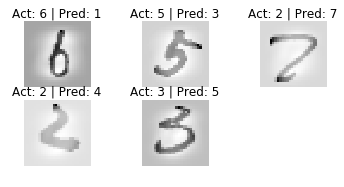

In [12]:
MLP = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4, solver='sgd', 
                    verbose=10, tol=1e-4, random_state=42, learning_rate_init=.1)

testmodel = MLP.fit(X_train, y_train)
Ytest_pred = testmodel.predict(X_test)

misclass_idx = np.where(y_test != Ytest_pred)

misclass_act = y_test[misclass_idx]
misclass_pred = Ytest_pred[misclass_idx]
misclass_img = X_test[misclass_idx]*255
misclass_img = misclass_img.astype(int)

misclass_list = zip(misclass_act,misclass_pred,misclass_img)

print "Sample Missclassifications:"
for index, missclass in enumerate(misclass_list[:5]):
    plt.subplot(3, 3, index+1)
    plt.axis('off')
    plt.imshow(missclass[2].reshape((28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Act: %i | Pred: %i' % (missclass[0], missclass[1]))
    
plt.show()

# Question 2: Regression Trees (10 points)

In this question, we will be exploring the application of regression tree (RT) using sklearn package in Python. You will be using the same Hitters.csv dataset (available on Canvas) used in HW2 Q5 to predict a baseball player’s Salary using all the 16 performance variables. Use a random state of 42 and a test size of 1/3 to split the data into training and test.

1. Build a regression using [DecisionTreeRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) with max_depth = 5. Report the mean squared errors on both training and test datasets. (4)
2. Repeat Part-1 with max_depth = 2. (4)
3. Briefly explain what you observe from these MSE values obtained by using maximum tree depths 5 and 2? Which tree is better and why? (2)

In [13]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [14]:
hitters = pd.read_csv("hitters.csv")
target = hitters['Salary']
del hitters['Salary']
X_train, X_test, y_train, y_test = train_test_split(hitters, target, test_size=0.333, random_state=42)

### Part 1

In [15]:
DTR = DecisionTreeRegressor(max_depth=5)
model = DTR.fit(X_train, y_train)

In [16]:
#training data
Ytrain_pred = model.predict(X_train)
train_MSE = mean_squared_error(y_train, Ytrain_pred)
print "Training data MSE:", train_MSE

#test data
Ypred_test = model.predict(X_test)
test_MSE = mean_squared_error(y_test, Ypred_test)
print "Test data MSE:", test_MSE

Training data MSE: 18749.4789728
Test data MSE: 211972.033541


### Part 2

In [17]:
DTR = DecisionTreeRegressor(max_depth=2)
model = DTR.fit(X_train, y_train)

In [18]:
#training data
Ytrain_pred = model.predict(X_train)
train_MSE = mean_squared_error(y_train, Ytrain_pred)
print "Training data MSE:", train_MSE

#test data
Ypred_test = model.predict(X_test)
test_MSE = mean_squared_error(y_test, Ypred_test)
print "Test data MSE:", test_MSE

Training data MSE: 69909.5877084
Test data MSE: 166165.705731


### Part 3

The decision tree with max depth of 5 performs better in-sample which makes us think that it is overfitting the data because it then performs poorly on the test data. The decision tree with max depth of 2 is better for the test data because it keeps the splits simple and does not over fit. 

# Question 3 - Support Vector Regression vs. Linear Regression (10pts)
Download datasets 'summer_gpa_test.csv' and 'summer_gpa_train.csv' from Canvas. With this toy dataset, we want to predict GPA in Summer 2016 for students using 5 different features. So, target variable will be 'GPA_summer2016' in this problem.

1. Fit a support vector regression using the default options on [sklearn's SVR](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) on training data. Note that the default kernel is "rbf".  Report the root MSE for both train and test data. (2)

2. Fit SVR with 'linear' kernel and Linear Regression (for other options, use default parameter settings). Report RMSE of prediction on train and test data for the two methods. (3)

3. Now, compare the results of three different methods, then provide a possible reason for SVR with RBF kernel not working well on test set. (1)

4.  Provide simple residual plots on Train and Test set for all three methods. Specifically, submit a scatter plot wherein y-axis shows the residuals and x-axis the predicted values. What can you learn about the effect of outliers on different models from this problem? (4)

In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

d_train = pd.read_csv('summer_gpa_train.csv',index_col='student')
d_test = pd.read_csv('summer_gpa_test.csv',index_col='student')

y_train = d_train['GPA_summer2016']
y_test = d_test['GPA_summer2016']
x_train = d_train.drop('GPA_summer2016',axis=1)
x_test = d_test.drop('GPA_summer2016',axis=1)

# Question 4: Bayesian Networks (10 pts)
#### Part (a) (5 points)
Consider the following Bayesian network of binary (True/False) variables.

<img src="hw4q4pic1.png">

This is equivalent to saying that X and Y are conditionally independent given C, or P(X,Y|C) = P(X|C)P(Y|C). This happens to be the assumption used by the Naive Bayes classifier.

The exact probabilities are given:  
P(X = True | C = True) = .75  
P(X = True | C = False) = .5  
P(Y = True | C = True) = .25  
P(Y = True | C = False) = .5  
P(C = True) = .5

Find P(C = True | X = True, Y = True). The easiest method is to use Bayes rule, along with the conditional independence equation given above.

#### (b) (5 points)
A new feature Z is added, and based on prior knowledge, we believe that one of the two networks given below properly captures the dependencies among the variables. Our goal is to determine P(C|X,Y,Z). For each of these two different networks:

<img src="hw4q4pic2.png">

will P(C|X,Y,Z) be the same as P(C|X,Y) (the inference from part a)? Or will it be different? Give a separate answer for each network.

# Question 5: Mulitclass Classification (5 points)

One way of using a binary classifier for addressing a multiclass classification problem is to use a One-vs.-All (or One-vs.-Rest)  strategy.

1. Briefly describe the  One-vs.-All method.  (2pts)

2. What are two disadvantages of using the One-vs.-All method in situations where the number of classes $N$ is very large? (3pts)